## Import Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Dataset

In [117]:
data = pd.read_csv('data/revenue-data.csv')

In [118]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


## Data Processing

### Label Encoding

In [119]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data["Education"] = le.fit_transform(data['Education'])
data["WorkType"] = le.fit_transform(data["WorkType"])
data['Sex'] = le.fit_transform(data['Sex'])
data['Region'] =  le.fit_transform(data['Region'])
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49
1,20,3758.36,149.36,4,2,0,0,7,42965.45
2,36,601.72,21.87,0,3,0,1,1,54924.41
3,21,44.89,182.80,9,3,0,0,5,26734.99
4,24,614.80,194.34,0,2,0,1,6,15325.23


## Data Exploration

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SiteSpending'}>,
        <AxesSubplot:title={'center':'SiteTime'}>],
       [<AxesSubplot:title={'center':'RecommendImpression'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'WorkType'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

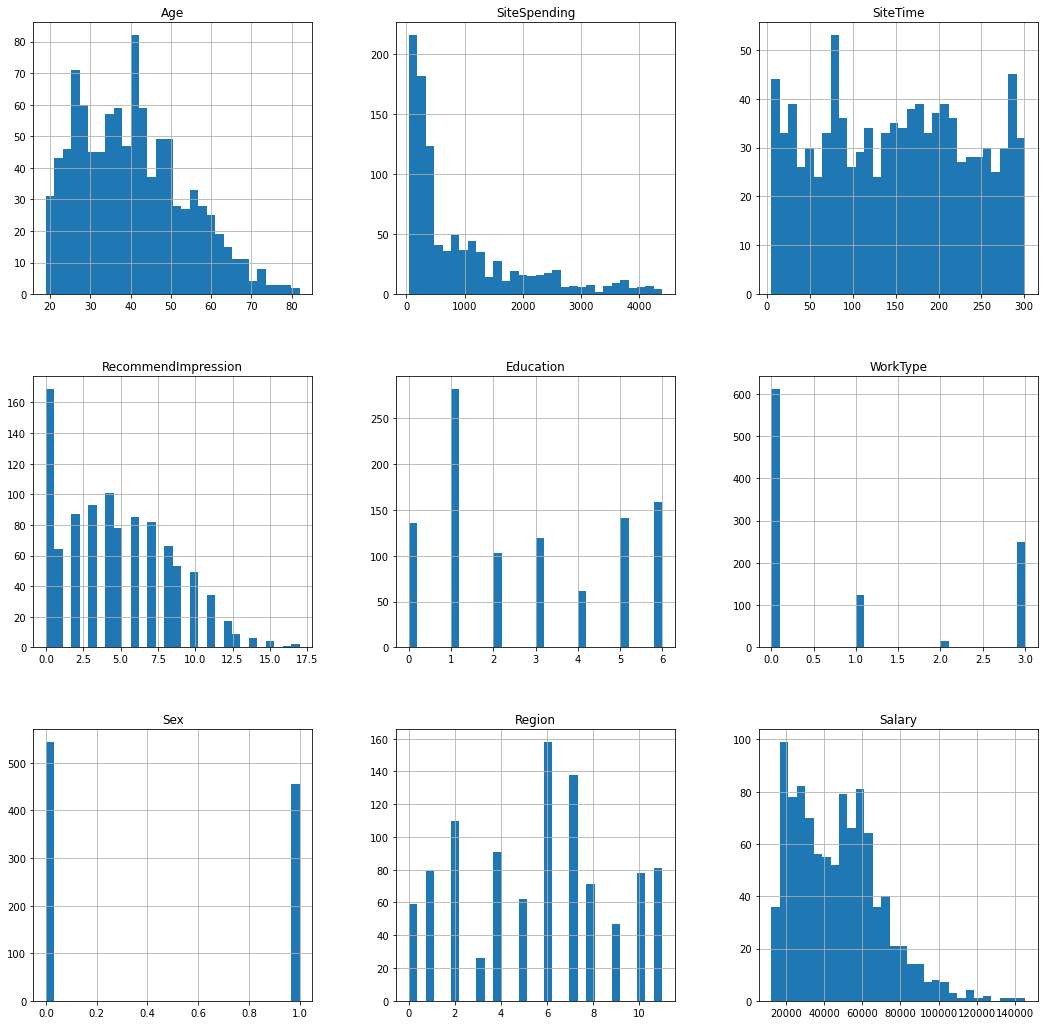

In [133]:
data.hist(bins=30, figsize=(18,18))

In [141]:
feature_names = data.drop('Salary', axis=1).columns

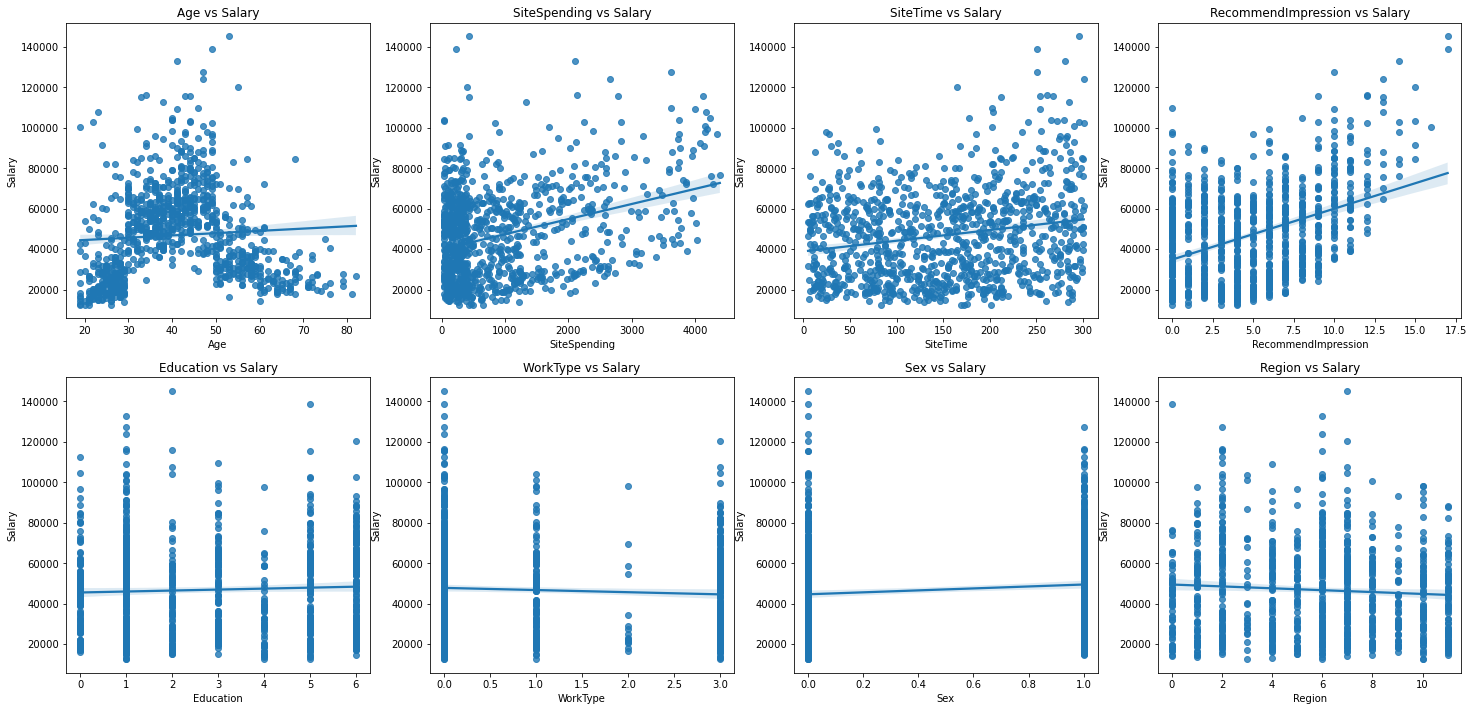

In [142]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(feature_names):
    plt.subplot(4, 4 , i+1)
    sns.regplot(x=col, y='Salary', data=data)
    plt.title("%s vs Salary" %(col))

<AxesSubplot:>

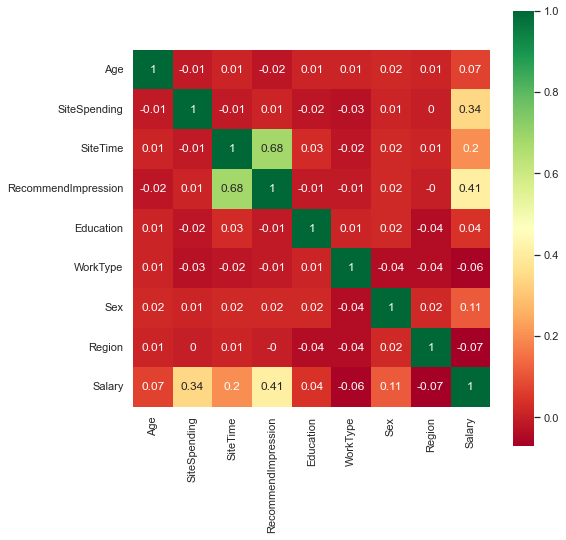

In [143]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(data.corr().round(2), square=True, cmap='RdYlGn', annot=True)

In [271]:
pearson_coef1, p_value1 = stats.pearsonr(data['RecommendImpression'], data['Salary'])
print("The Pearson Correlation Coefficient for Recommend Impression is", pearson_coef1, " with a P-value of P = ", p_value1)  

pearson_coef2, p_value2 = stats.pearsonr(df['SiteSpending'], df['Salary'])
print("The Pearson Correlation Coefficient for Site Spending is", pearson_coef2, " with a P-value of P = ", p_value2) 

print("Is there strong evidence if corelation is signifcant for Recommend Impression :- ", p_value1 < 0.001) 
print("Is there strong evidence if corelation is signifcant for Site Spending :- ", p_value2 < 0.001) 

The Pearson Correlation Coefficient for Recommend Impression is 0.4092305619106019  with a P-value of P =  1.1689654018744592e-41
The Pearson Correlation Coefficient for Site Spending is 0.33621446970226143  with a P-value of P =  7.522773257054765e-28
Is there strong evidence if corelation is signifcant for Recommend Impression :-  True
Is there strong evidence if corelation is signifcant for Site Spending :-  True


## Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression Object
lm1 = LinearRegression()
X1 = data[['RecommendImpression']]
Y1 = data[['Salary']] # Target

# Fit (Train) the model
lm1.fit(X1,Y1)

print("Intercept for the model is", lm1.intercept_, "and the scope is",lm1.coef_)

# Prediction
Yout1 = lm1.predict(X1)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout1[0:5])
print("Actual Values:",Y1.values[0:5])

Intercept for the model is [34786.94541936] and the scope is [[2518.70965487]]
Predicted Values: [[34786.94541936]
 [44861.78403885]
 [34786.94541936]
 [57455.33231322]
 [34786.94541936]]
Actual Values: [[60173.49]
 [42965.45]
 [54924.41]
 [26734.99]
 [15325.23]]


In [151]:
lm2 = LinearRegression()
X2 = data[['RecommendImpression', 'SiteSpending']]
Y2 = data[['Salary']] # Target

# Fit (Train) the model
lm2.fit(X2,Y2)

print("Intercept for the model is", lm2.intercept_, "and the scope is",lm2.coef_)

# Prediction
Yout2 = lm2.predict(X2)

# Actual and Predicted values (first five)
print("Predicted Values:",Yout2[100:105])
print("Actual Values:",Y2.values[100:105])

Intercept for the model is [28004.19008903] and the scope is [[2499.75417968    7.39006264]]
Predicted Values: [[54441.4236213 ]
 [46423.64065464]
 [44684.57084697]
 [54139.26918473]
 [56174.35126874]]
Actual Values: [[26262.77]
 [58138.44]
 [30542.31]
 [39176.26]
 [72743.43]]


### Model Visualization

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


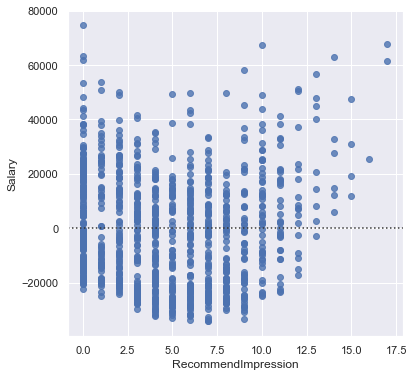

In [150]:
plt.figure(figsize=(6,6))
sns.residplot(data['RecommendImpression'],data['Salary'])
plt.show()

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\syedi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

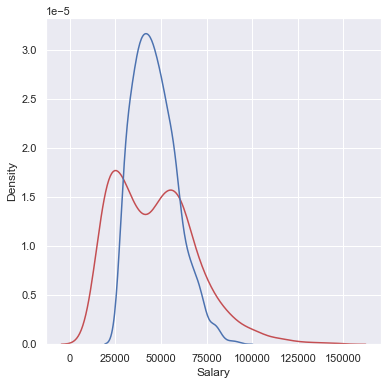

In [149]:
plt.figure(figsize=(6,6))
ax1 = sns.distplot(data['Salary'], hist=False, color="r", label="Actual")
sns.distplot(Yout2, hist=False, color="b", label="Fitted", ax=ax1)

### Evaluation Metrics

In [152]:
from sklearn.metrics import mean_squared_error

# Simple Linear Regression

mse1 = mean_squared_error(Y1,Yout1)
print("Mean square error for simple linear regression is",mse1)
print("R-Square value for simple linear regression is", lm1.score(X1,Y1))
print("\n")

# Multiple Linear Regression

mse2 = mean_squared_error(Y2,Yout2)
print("Mean square error for mulitple linear regression is",mse2)
print("R-Square value for multiple linear regression is", lm2.score(X2,Y2))

Mean square error for simple linear regression is 424618976.17599785
R-Square value for simple linear regression is 0.16746965280166703


Mean square error for mulitple linear regression is 368252650.5398839
R-Square value for multiple linear regression is 0.2779844420245535


In [155]:
print("Root-mean-square error for simple linear regression is ",np.sqrt(mse1))
print("Root-mean-square error for mulitple linear regression is ",np.sqrt(mse2))

Root-mean-square error for simple linear regression is  20606.284870786338
Root-mean-square error for mulitple linear regression is  19189.91012328833


## Support Vector Regressor

In [202]:
X = df.drop(columns= ["Salary"])
y = df['Salary']

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [204]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [206]:
y_pred = regressor.predict(X_test)

In [207]:
test_score = regressor.score(X_test, y_test)

In [208]:
test_score

0.6438353477663408

In [209]:
train_score = regressor.score(X_train, y_train)

train_score

0.7619773138205796

In [222]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.08242692270783723
0.009853586395787635
0.09926523256300583


## Decision Tree Regressor

In [23]:
X = df.drop(columns= ["Salary"])
y = df['Salary']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 8)
(300, 8)
(700,)
(300,)


In [26]:
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = tree.DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred = reg.predict(X_test)

In [30]:
test_score = reg.score(X_test, y_test)

In [31]:
test_score

0.7069246724910399

In [32]:
train_score = reg.score(X_train, y_train)

In [33]:
train_score

1.0

In [34]:
import seaborn as sns

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

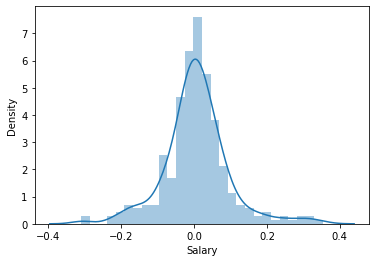

In [35]:
# checking difference between labled y and predicted y
sns.distplot(y_test-y_pred)

##### We get almost a bell shaped curve which indicates that the predicted values are in similar ranges as the original values.

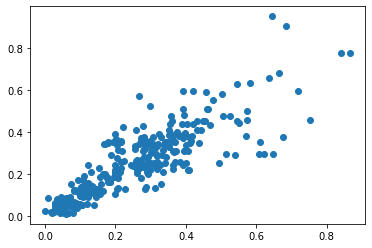

In [36]:
plt.scatter(y_test,y_pred)

### Hyperparameter Tuning

In [37]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [38]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [39]:
tuning_model=GridSearchCV(reg,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [40]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [41]:
X=df.iloc[:,:-1]

In [42]:
y=df.iloc[:,-1]

In [43]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,y)

timer(start_time)

In [44]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 80,
 'min_samples_leaf': 8,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [45]:
# best model score
tuning_model.best_score_

-0.010596557773299509

In [272]:
tuned_hyper_model= tree.DecisionTreeRegressor(max_depth= 7,
                                        max_features= 'log2',
                                        max_leaf_nodes= 80,
                                        min_samples_leaf= 8,
                                        min_weight_fraction_leaf= 0.1,
                                        splitter= 'best')

#### Fitting Tuned Model

In [273]:
tuned_hyper_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, max_features='log2', max_leaf_nodes=80,
                      min_samples_leaf=8, min_weight_fraction_leaf=0.1)

In [274]:
tuned_y_pred = tuned_hyper_model.predict(X_test)

In [275]:
tuned_y_pred_df =  pd.DataFrame(tuned_y_pred)
tuned_y_pred_df = tuned_y_pred_df.rename(columns={0: 'Predicted Salary'})
tuned_y_pred_df

,Predicted Salary
0,0.350351
1,0.331791
2,0.280649
3,0.066427
4,0.368698
...,...
295,0.127069
296,0.473184
297,0.280649
298,0.280649


In [276]:
tuned_test_score = tuned_hyper_model.score(X_test, y_test)

In [277]:
tuned_test_score

0.5981101484943541

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

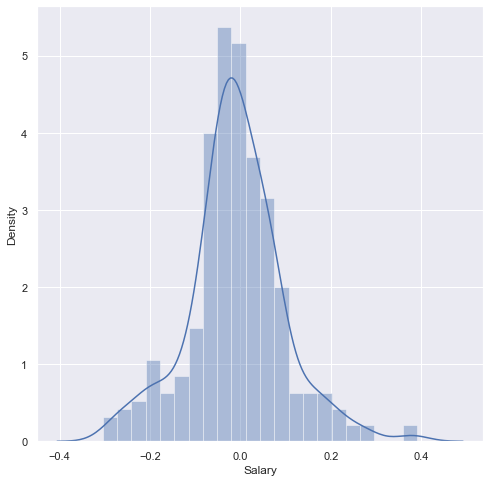

In [278]:
sns.distplot(y_test-tuned_y_pred)

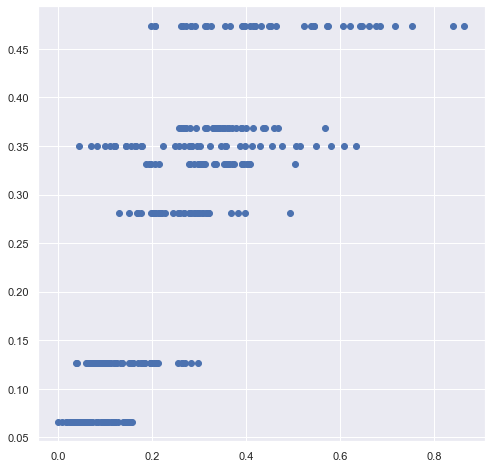

In [279]:
plt.scatter(y_test,tuned_y_pred)

### Evaluation Metrics

In [280]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.10388933731955478
0.016716824402697096
0.1292935590147363


In [281]:
print(metrics.mean_absolute_error(y_test, tuned_y_pred))
print(metrics.mean_squared_error(y_test, tuned_y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, tuned_y_pred)))

0.07696734354344344
0.011118611430320096
0.10544482647489205


## Random Forrest Regressor

In [282]:
from sklearn.ensemble import RandomForestRegressor

rf =RandomForestRegressor(n_estimators=1000, random_state= 43)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=43)

In [283]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 8)
(300, 8)
(700,)
(300,)


In [284]:
y_pred = rf.predict(X_test)

In [285]:
test_score = rf.score(X_test, y_test)
test_score

0.8984557546500777

### Evaluation metrics

In [286]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.0380572052754927
0.002809304596274469
0.05300287347186442


## KNeighborsRegressor

In [63]:
from sklearn.neighbors import KNeighborsRegressor

# Lets define models with different neighbours

for i in range(1,11):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)
    print("n_Neighbour = " + str(i) + " MSE = " + str(metrics.mean_squared_error(y_test, y_pred)))

n_Neighbour = 1 MSE = 0.026992141361485037
n_Neighbour = 2 MSE = 0.018425961887252124
n_Neighbour = 3 MSE = 0.018018715476230605
n_Neighbour = 4 MSE = 0.016716824402697096
n_Neighbour = 5 MSE = 0.017068953799817845
n_Neighbour = 6 MSE = 0.01693412207814973
n_Neighbour = 7 MSE = 0.017383478792249628
n_Neighbour = 8 MSE = 0.01778446901613431
n_Neighbour = 9 MSE = 0.01852202118496106
n_Neighbour = 10 MSE = 0.01847882925005364


In [266]:
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [267]:
y_pred = neigh.predict(X_test)

In [268]:
test_score = neigh.score(X_test, y_test)
test_score

0.3957588931900933

In [269]:
train_score = neigh.score(X_train, y_train)
train_score

0.5990475117015732

### Evaluation metrics

In [270]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.10388933731955478
0.016716824402697096
0.1292935590147363
